In [364]:
# Import Libraries
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import re

In [365]:
path = "PATH"

In [366]:
pd.set_option('display.max_colwidth', 100)

In [367]:
startupscouk_df = pd.read_csv(path + "startupscouk_dataset_raw.csv")

In [368]:
startupscouk_df.drop_duplicates()
startupscouk_df = startupscouk_df.drop_duplicates(['title'], keep='first')

In [369]:
startupscouk_df.describe()

,title,published_date,author,content
count,960,960,960,960
unique,960,530,26,960
top,Revolut banks on return to office,2022-01-10,Helena Young,Fintech darling and former Startups 100 winner Revolut has signed a 10-year lease with the YY L...
freq,1,55,371,1


In [370]:
startupscouk_df = startupscouk_df.dropna()

In [371]:
startupscouk_df.content = startupscouk_df.content.replace(r'\s+', ' ', regex=True)

In [372]:
startupscouk_df['content'] = startupscouk_df['content'].str.replace('Share this post facebook twitter linkedin', '')
startupscouk_df['content'] = startupscouk_df['content'].str.replace('Startups.co.uk is reader-supported. If you make a purchase through the links on our site, we may earn a commission from the retailers of the products we have reviewed. This helps Startups.co.uk to provide free reviews for our readers. It has no additional cost to you, and never affects the editorial independence of our reviews.', '')
startupscouk_df['content'] = startupscouk_df['content'].str.replace('Startups.co.uk is reader supported – we may earn a commission from our recommendations, at no extra cost to you and without impacting our editorial impartiality.', '')
startupscouk_df['content'] = startupscouk_df['content'].str.replace('Verifying Get the latest startup news, straight to your inbox Stay informed on the top business stories with Startups.co.uk’s weekly newsletter Please fill in your name Please fill in your email Subscribe By signing up to receive our newsletter, you agree to our Privacy Policy. You can unsubscribe at any time.', '')
startupscouk_df['content'] = startupscouk_df['content'].str.replace('Startups.co.uk', '')




In [373]:
startupscouk_df['content'] = startupscouk_df['content'].str.replace(r'http\S+|www.\S+', '', case=False)

In [374]:
startupscouk_df['content'] =  [re.sub(r'(?<=[.,?%:])(?=[^\s])', r' ', str(x)) for x in startupscouk_df['content']]

In [375]:
startupscouk_df['published_date'] = startupscouk_df['published_date'].apply(lambda x: parser.parse(x))

In [376]:
startupscouk_df

,title,published_date,author,content
0,Revolut banks on return to office,2024-06-18,Helena Young,Fintech darling and former Startups 100 winner Revolut has signed a 10-year lease with the YY L...
1,List of banned business names shows Brits still love swearing,2024-06-18,Helena Young,Choosing a business name requires a bit of creative thinking. But new data suggests that the up...
2,Labour vows to introduce Ethnicity Pay Gap reporting,2024-06-13,Helena Young,The Labour Party has said it will require all large businesses to publish an Ethnicity Pay Gap ...
3,How you can work remotely from countries that don’t have a Digital Nomad visa,2024-06-13,Helena Young,"Digital Nomad visas have taken the world by storm. Well, most of it. While 50 countries now hav..."
4,New Zealand Digital Nomad visa: what we know so far,2024-06-12,Helena Young,"New Zealand, also known as Aotearoa or “land of the long white cloud”, is considering introduci..."
...,...,...,...,...
955,Autosmart revs up growth with new Scotland franchisee,2014-03-04,Megan Dunsby,"Autosmart, one of the leading suppliers of vehicle cleaning products to the trade, has signed a..."
956,A-Star Sports and Sports Xtra merge franchises to “take both brands forward”,2015-03-16,Megan Dunsby,"A-Star Sports, featured in the Startups 100 index, has announced that it is to merge with compe..."
957,Ambitious Papa John’s franchisee opens fourth store,2014-05-01,Natasha Mc Gowan,"Pizza delivery chain Papa John’s has announced the opening of its latest outlet in Banbury, Oxf..."
958,15 mumpreneurs become arts and crafts franchisees,2016-08-17,Shane Donnelly,15 mumpreneurs have changed careers to become Creation Station franchisees. The children’s arts...


In [377]:
authors_count = startupscouk_df.groupby(["author"]).size().reset_index(name='counts').sort_values(["counts"], ascending=False)

In [378]:
authors_count.head(50)

,author,counts
9,Helena Young,371
10,Henry Williams,109
7,Fernanda Alvarez Pineiro,103
15,Megan Dunsby,87
25,Stephanie Lennox,86
23,Shane Donnelly,41
14,Kirstie Pickering,39
20,Ross Darragh,30
2,Alec Hawley,25
21,Ryan Platt,16


<Axes: xlabel='published_date'>

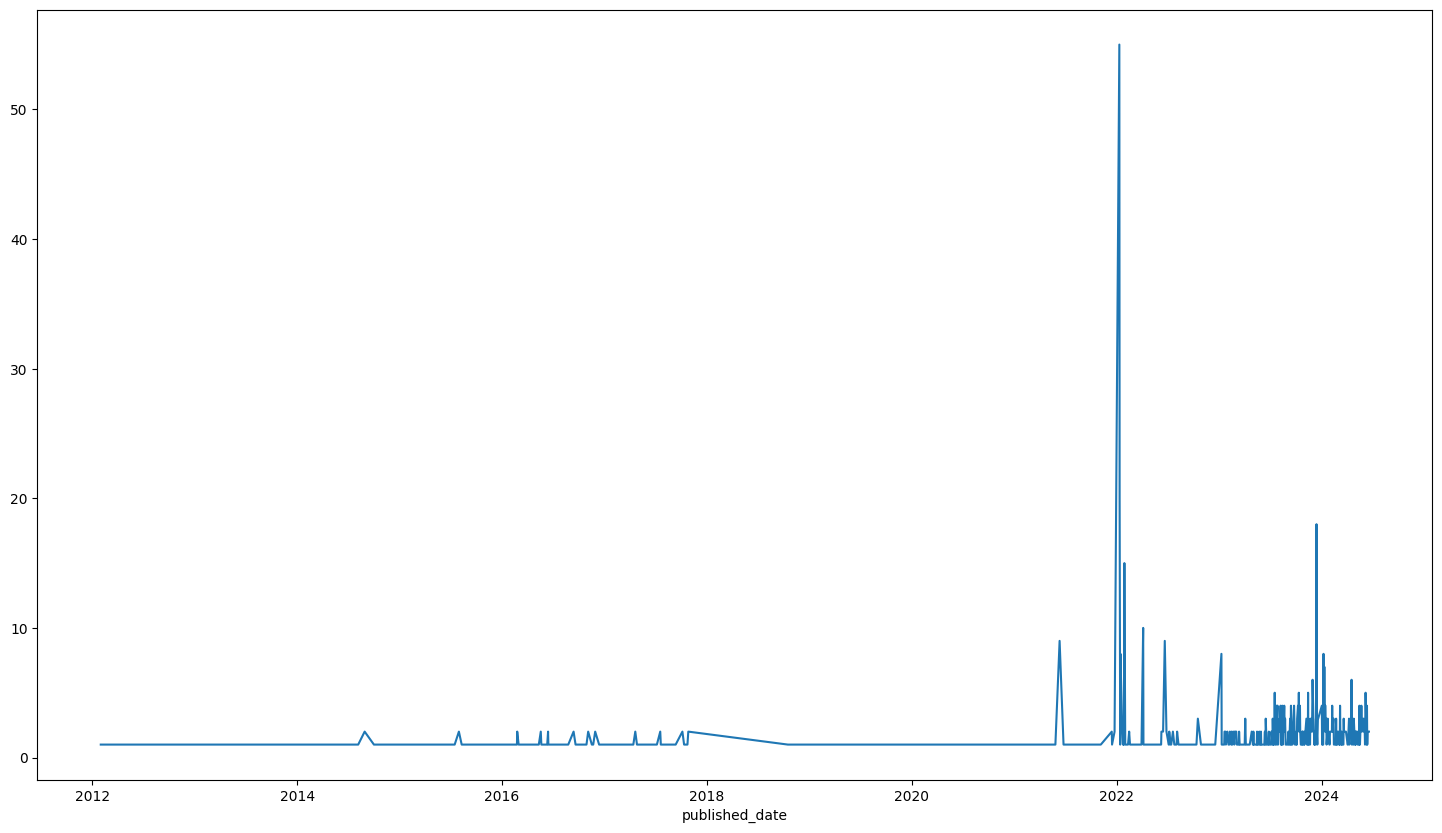

In [379]:
# Need to expand dates - the chart only shows occurences but not a complete timeline
startupscouk_df.groupby(startupscouk_df['published_date'].dt.date).size().plot(figsize=(18, 10))

In [380]:
startupscouk_df.groupby(startupscouk_df['published_date'].dt.date).size().sort_values()

published_date
2012-01-31     1
2023-04-07     1
2023-04-06     1
2023-04-02     1
2023-04-01     1
              ..
2022-01-29    10
2022-01-28    15
2023-12-14    18
2022-01-11    20
2022-01-10    55
Length: 530, dtype: int64

In [381]:
startupscouk_df.sort_values(by='published_date')

,title,published_date,author,content
787,LinkedIn game helps entrepreneurs risk-assess their business,2012-01-31,Georgina-Kate Adams,An innovative new game to help entrepreneurs risk-assess their business ventures has been launc...
788,"Top 20 round-up: Blue Dot secures £50,000 investment through NESTA",2012-02-15,Georgina-Kate Adams,Blue Dot has been selected as one of the first 15 businesses to secure investment from NESTA’s ...
789,£1m funding on offer for innovative green start-ups,2012-04-16,Steph Welstead,Eco-entrepreneurs have just over one day left to apply for an accelerator programme backed by f...
791,Government launches start-up loans for young entrepreneurs,2012-05-27,Steph Welstead,"The government has launched a new scheme offering loans to young entrepreneurs, to help them st..."
790,HSBC Merchant Services transforms smartphones into card payment terminals,2012-06-14,Georgina-Kate Adams,"HSBC Merchant Services has launched a new product to allow sole traders, freelancers and mobile..."
...,...,...,...,...
4,New Zealand Digital Nomad visa: what we know so far,2024-06-12,Helena Young,"New Zealand, also known as Aotearoa or “land of the long white cloud”, is considering introduci..."
3,How you can work remotely from countries that don’t have a Digital Nomad visa,2024-06-13,Helena Young,"Digital Nomad visas have taken the world by storm. Well, most of it. While 50 countries now hav..."
2,Labour vows to introduce Ethnicity Pay Gap reporting,2024-06-13,Helena Young,The Labour Party has said it will require all large businesses to publish an Ethnicity Pay Gap ...
1,List of banned business names shows Brits still love swearing,2024-06-18,Helena Young,Choosing a business name requires a bit of creative thinking. But new data suggests that the up...


In [382]:
startupscouk_df.groupby(df_merged['title']).size().sort_values()

title
#Quittok: why are young people quitting on TikTok?                                         1
Side hustle tax: Amazon is paying less tax than Vinted sellers                             1
Signed, sealed, and undelivered: 90% of shoppers admit to abandoning an online purchase    1
Silicon Valley Bank UK collapse and HSBC Rescue – what you need to know                    1
SimplySwitch founder Karen Darby launches socially-focused crowdfunding platform           1
                                                                                          ..
Headed for administration, why did The Body Shop fail?                                     1
Here are the top 10 cities in the UK for female entrepreneurs                              1
Here’s how to make your small business more sustainable, on a budget                       1
Here’s where all your staff are going (and how to stop them from leaving)                  1
“WeWork is here to stay” – coworking firm reassures UK tenants d

In [383]:
display(startupscouk_df.loc[startupscouk_df['title'] == 'UK female entrepreneurs have received £100m in Start Up Loans']['content'])

233     Budding female entrepreneur? Looking for funding to get your idea off the ground? Then you may ...
Name: content, dtype: object

In [384]:
startupscouk_df.to_csv(path+"startupscouk_dataset_clean.csv", index = None, header=True) 